In [1]:
#Including libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
#reading data from link
iris=load_iris()

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


C:\Users\AISHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


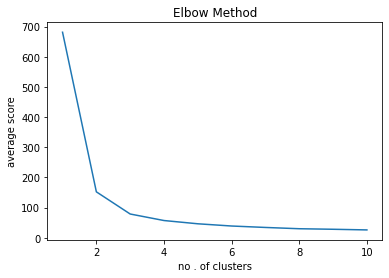

In [6]:
sse=[]
for n in range(1,11):
    kmean=KMeans(n_clusters=n)
    kmean.fit(iris['data'])
    sse.append(kmean.inertia_)
#Now plotiing the results on the line graph
from matplotlib import pyplot as plt
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('no . of clusters')
plt.ylabel('average score')
plt.show()

In [7]:
#From the graph the elbow point is 3 and hence optimum no. of cluster is 3.

In [8]:
#we willcreate k-mean classifier
model=KMeans(n_clusters=3)
#fitting iris data
model.fit(iris['data'])

KMeans(n_clusters=3)

In [9]:
#prediction of datset
data.target=model.labels_
d1=data[data.target==0]
d2=data[data.target==1]
d3=data[data.target==2]

In [10]:
#centriods is
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

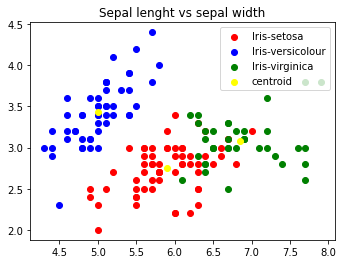

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(d1[['sepal length (cm)']],d1[['sepal width (cm)']], color = 'red', label = 'Iris-setosa')
plt.scatter(d2[['sepal length (cm)']], d2[['sepal width (cm)']], color = 'blue', label = 'Iris-versicolour')
plt.scatter(d3[['sepal length (cm)']], d3[['sepal width (cm)']], color = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, [0]], model.cluster_centers_[:,[1]], color = 'yellow', label = 'centroid')
plt.title('Sepal lenght vs sepal width')
plt.legend()

In [ ]:
#From the above plot it is clear that there are 3 clusters and each has centroids that are represented with yellow color.